<h1>Deustch Algorithm


***

<h2>Table of Contents

<h2>Introduction

<h5> 

<h2>Problem Description

<h5>The Deutsch problem is a foundational problem in quantum computing that was introduced by David Deutsch in the 1980s. It serves as a key example of the capabilities of quantum algorithms and how sometimes, they can surpass classical algorithms.

The problem states, you are given a quantum black-box oracle function f: {0,1} -> {0,1}, which takes a single binary input bit and returns a single binary output bit. This oracle function is guaranteed to be either constant (i.e., it always returns 0 or always returns 1) or balanced (i.e., it returns 0 for one input and 1 for the other input).

Input: a funtion f : {0,1} -> {0,1}
Output: 0 if f is constant, 1 if f is balanced


<h2>Constant and Balanced Functions

<h2>Constant: 

<h5>This circuit represents the scenario where the function is constant and always outputs 0. The quantum circuit applies Hadamard gates, simulates the constant function (no operation applied), and performs a measurement.

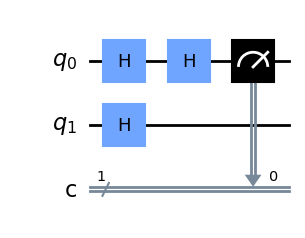

In [25]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with two qubits and one classical register
qc_constant = QuantumCircuit(2, 1, name='Constant Oracle')

# Apply Hadamard gates to both qubits
qc_constant.h(range(2))

# Apply no operation to simulate a constant function that always outputs 0

# Apply Hadamard gate to the first qubit
qc_constant.h(0)

# Measure the first qubit and store the result
qc_constant.measure(0, 0)

# Draw the circuit
circuit_drawer(qc_constant, output='mpl')



<h2>Balanced: 

<h5>This circuit represents the scenario where the function is balanced, alternating between 0 and 1. The quantum circuit applies Hadamard gates, simulates a balanced function (using a CNOT gate in this case), and performs a measurement to determine the nature of the function.

These circuits visually illustrate Deutsch's algorithm for the constant and balanced function cases in Qiskit.

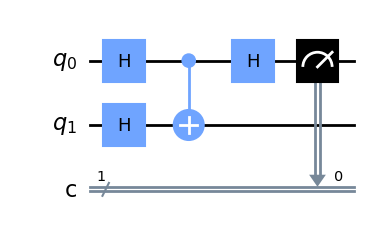

In [27]:
# Create a quantum circuit with two qubits and one classical register
qc_balanced = QuantumCircuit(2, 1, name='Balanced Oracle')

# Apply Hadamard gates to both qubits
qc_balanced.h(range(2))

# Apply a CNOT gate to simulate a balanced function (for demonstration purposes)
qc_balanced.cx(0, 1)  # CNOT gate where qubit 0 is the control and qubit 1 is the target

qc_balanced.h(0)

qc_balanced.measure(0, 0)

# Draw the circuit
circuit_drawer(qc_balanced, output='mpl')


<h2>What is quantum computing?

<h2>Oracle

<h5>An oracle refers to a theoretical black-box device or function. Oracles are used to perform specific computational tasks or provide information, typically in the form of queries, without revealing the inner workings of the function.

<h3>Classical
<h5>In classical computing, an oracle is typically portrayed as a black box that receives input and outputs data depending on some unidentified function. It's a conceptual tool for describing algorithms or methods for solving problems without giving away the specifics of the algorithm. In complexity theory, for example, an oracle machine could tell us whether a problem is solvable or not, but it wouldn't tell us how the solution is arrived at.

<h3>Quantum
<h5>In quantum computing, an oracle is a crucial component of several quantum algorithms, such as Deutsch-Jozsa algorithm. It's represented as a quantum gate or a quantum circuit that implements a specific function or computation.
<br>
<br>
Black-Box Function: Quantum oracles operate similarly to classical oracles but in a quantum context. They represent a function or transformation that can be implemented in a quantum circuit.
<br>
Unitary Transformation: In quantum computing, an oracle is typically implemented as a unitary transformation acting on qubits. It's a quantum operation that maintains the probability amplitudes of quantum states and is completely reversible.
<br>
Information Hiding: Oracles in quantum computing often hide information about the inner workings of the function being implemented. They provide access to specific computational steps without revealing the function's logic, crucial for quantum algorithms to exploit quantum parallelism and superposition effectively.

<h2>Qubits

<h5>A qubit, short for "quantum bit," is the fundamental unit of quantum information, analogous to the classical bit in classical computing. However, unlike classical bits, which can only be in a state of 0 or 1, qubits can exist in superpositions of these classical states.
<br>
<br>
Standard Representation: A qubit's general quantum state in quantum mechanics can be expressed as a linear superposition of its two orthonormal basis states, also known as basis vectors. These two orthonormal basis states, {|0⟩,|1⟩}(Pronoumced Ket 0 and Ket 1), together called the computational basis, are said to span the two-dimensional linear vector (Hilbert) space of the qubit. (Hilbert spaces provide a framework to model the states of quantum systems, where each vector represents a possible state of the system, and the inner product captures the notion of orthogonality and probability amplitudes in quantum mechanics)
<br> 
<br>
Measurement: When a qubit is measured, it collapses from its superposition state to one of the basis states (0 or 1) probabilistically, with the probability of each outcome determined by the squared magnitudes of the amplitudes.
<br>
<br>
Bloch Sphere Representation: The state of a single qubit can be represented geometrically on the Bloch sphere, a unit sphere where the north and south poles represent the basis states ∣0⟩ and ∣1⟩, respectively, and points on the surface represent superposition states.
<br>
<br>
Quantum Entanglement: Qubits can be entangled, meaning the state of one qubit becomes dependent on the state of another, even when they are far apart. This property allows for quantum correlations and enables quantum algorithms like quantum teleportation(a technique for transferring quantum information from a sender at one location to a receiver some distance away) and superdense codiing(communicates a number of classical bits of information by only transmitting a smaller number of qubits, under the assumption of sender and receiver pre-sharing an entangled resource.).


<h2>Density Matrix

<h2>Reversable Computing

<h2>Deutsch Algorithm in Full

In [28]:
from qiskit import QuantumCircuit


def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

deutsch_function(3).draw()

def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

compile_circuit(
    deutsch_function(3)
).draw()



┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/════════════════════════════════╩═
                                     0

<h2>References

<h4>
<a href="https://github.com/ianmcloughlin/notes">Emerging Technologies Notes</a>
<br>
<a href="https://learning.quantum.ibm.com/course/basics-of-quantum-information">Quantum Information</a>
<br>
<a href="https://en.wikipedia.org/wiki/Qubit">Qubits</a>
<br>
<a href="https://quantumcomputing.stackexchange.com/questions/4625/what-exactly-is-an-oracle">Oracles</a>
<br>
<a href=""></a>